<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

# TS0: Primeros pasos en la simulación
**Alumna:** Agustina Rocío Paolini Rosso  
**Carrera:** Ingeniería Biomédica  
**Materia:** Análisis y Procesamiento de Señales  
**Fecha:** Agosto 2025  

## Consigna
Diseñar una función en Python que genere una **señal sinusoidal** y permita parametrizar:

- Amplitud máxima `vmax` (V)  
- Valor medio `dc` (V)  
- Frecuencia `ff` (Hz)  
- Fase `ph` (rad)  
- Cantidad de muestras `nn`  
- Frecuencia de muestreo `fs` (1/s)  

La función se debe poder llamar como:  

```python
tt, xx = mi_funcion_sen(vmax=1, dc=0, ff=1, ph=0, nn=N, fs=fs)  
```

Tanto `tt` como `xx` deben ser vectores de tamaño N x 1.

Se pide:

- Graficar la señal.  
- (*Bonus*) Probar la función para distintas frecuencias (`500 Hz`, `999 Hz`, `1001 Hz`, `2001 Hz`).  
- (*Bonus*) Implementar otra señal propia de un generador.  



## Resolución

En este trabajo práctico se aborda la generación de señales periódicas como paso inicial para simulaciones en procesamiento de señales.  

Una señal sinusoidal es una de las señales más fundamentales en ingeniería y física, ya que representa oscilaciones regulares y se encuentra presente en fenómenos eléctricos, mecánicos y acústicos. En la práctica, poder generar y manipular estas señales de manera digital permite analizar sistemas, diseñar filtros y realizar experimentos de forma controlada.  

En este notebook se combinarán conceptos teóricos con implementación práctica, utilizando Python y librerías como `numpy` y `scipy.signal`, y se mostrarán gráficos con `matplotlib` para visualizar las señales generadas.  

De esta forma, como primer paso, se generó la señal sinusoidal solicitada, que se describe matemáticamente como:  

\begin{equation}
x(t) = A \cdot \sin(2 \pi f t + \phi) + DC 
\end{equation}

donde:

- $A = \text{vmax}$ → amplitud máxima de la señal.  
- $f = \text{ff}$ → frecuencia de la señal en *Hz* (número de ciclos por segundo).  
- $t = tt$ → vector de tiempo discretizado.  
- $\phi = \text{ph}$ → fase inicial de la señal, que desplaza la onda horizontalmente.  
- $DC = \text{dc}$ → valor medio de la señal, que desplaza la onda hacia arriba o abajo.


Para simular la señal en una computadora es necesario discretizar el tiempo:

$$
t[n] = n \cdot T_s, \quad n = 0,1,2,\dots,N-1  \tag{1}
$$

donde:

- $T_s = \frac{1}{f_s}$ es el intervalo de muestreo, con $f_s$ la frecuencia de muestreo del ADC (Analog-to-Digital Converter). Según ésta, se muestra la señal analógica en un instante de tiempo. La función del ADC es tomar una señal contínua y convertirla en valores digitales que una computadora puede procesar.

Es importante mencionar que, para no perder información de la señal, la frecuencia de muestreo debe ser al menos el doble de la frecuencia de la señal, por el **Teorema de Nyquist-Shannon**. 
- $N = \text{nn}$ es la cantidad de muestras a generar, digitalizadas por el ADC. 

La señal digitalizada queda:

$$
x[n] = A \cdot \sin(2 \pi f t[n] + \phi) + DC \tag{2}
$$

Esto permite almacenar los valores de la onda en un vector y procesarlos con Python.

Con el fin de visualizar la señal, se generó la función para graficarla mostrando la forma de la onda, la amplitud máxima, el efecto de la frecuencia y la fase, y el desplazamiento del valor medio (DC offset).  

La visualización es fundamental ya que permite analizar rápidamente las características de la onda y verificar la correcta generación digital.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def funcion_sen(vmax=1, dc=0, ff=1, ph=0, nn=1000, fs=1000):
    
    t_muestra = 1/fs  # Obtengo tiempo al que se toma cada muestra  [s]
    
    tt = np.arange(nn) [:, np.newaxis] *t_muestra #(Nx1)
    xx = vmax*np.sin(2*np.pi*ff*tt + ph) + dc
    
    return tt, xx

def grafico(x, y, titulo, eje_x, eje_y):   #Función para graficar
    plt.plot(x, y, 'r', label = 'Señal')   # Utilizo linea
    plt.xlabel(eje_x)
    plt.ylabel(eje_y)
    plt.title(titulo)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Otorgando valores a los parámetros de la función `funcion_sen` y graficando la misma, se observaron los siguientes resultados:

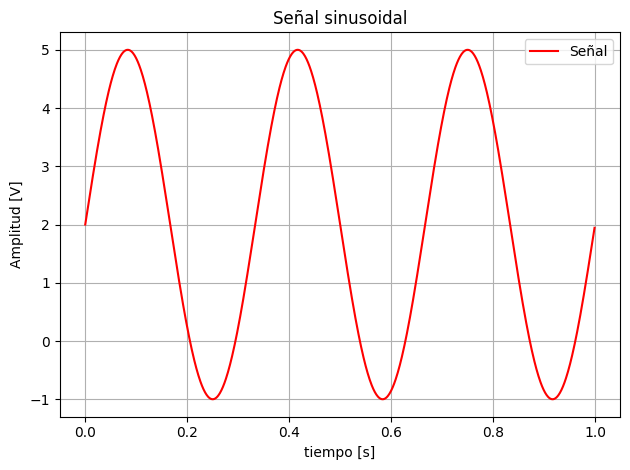

In [3]:
vmax = 3  # [V]
dc = 2 # Valor medio [V]
ff = 3  # Frecuencia [Hz]
ph = 0  # Fase en radianes
nn = 1000  # Cantidad de muestras
fs = 1000  # Frecuencia de muestreo 

tt, xx = funcion_sen(vmax, dc, ff, ph, nn, fs)
grafico(tt, xx, 'Señal sinusoidal', 'tiempo [s]', 'Amplitud [V]')

En el eje horizontal, el tiempo `tt` va desde $0 \, \text{s}$ hasta aproximadamente $\frac{nn - 1}{fs)} \approx 0.999 \, \text{s}$ y cada punto representa un instante de muestreo ($1 \, \text{ms}$). En el eje vertical, se observa la amplitud de la señal `xx` y la onda oscila alrededor del valor medio $dc = 2 \, \text{V}$.  
La onda realiza 3 ciclos por segundo, dada su frecuencia $ff = 3 \, \text{Hz}$, y la frecuencia de muestreo seleccionada es suficiente para representarla correctamente.   

Este es un caso de *oversampling* o sobremuestreo, donde la señal tiene una frecuencia mucho menor que la frecuencia de Nyquist ($\frac{f_s}{2}$). Las réplicas espectrales de la señal están separadas y no se solapan entre sí, lo que permite, luego, mediante un filtro pasa-bajos, reconstruir la señal muestrada sin ningún tipo de distorsión. 

### Bonus
En primer lugar, se probó la frecuencia de `ff = 500 Hz`, manteniendo la misma amplitud, fase, cantidad de muestras y frecuencia de muestreo. Se modificó únicamente el offset, `dc = 0 V`.

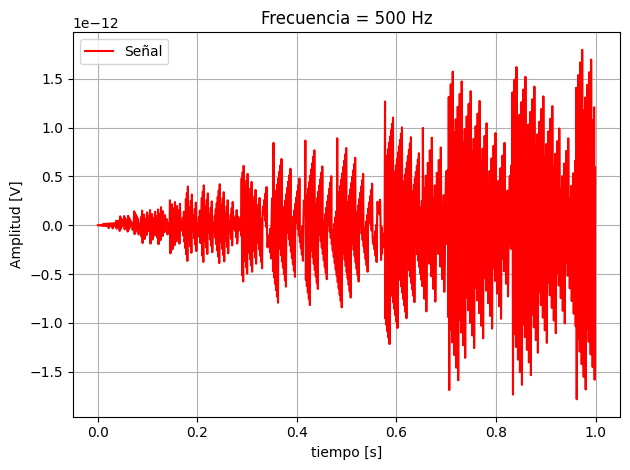

In [6]:
t_1, x_1 = funcion_sen(vmax, 0, 500, ph, nn, fs)
grafico(t_1, x_1, 'Frecuencia = 500 Hz', 'tiempo [s]', 'Amplitud [V]')

La relación entre la frecuencia de la señal y la frecuencia de muestreo, por el Teorema de Nyquist-Shannon, es:

$$
\frac{f_s}{f} = \frac{1000}{500} = 2
$$

Nos encontramos en el límite del teorema: solo hay 2 puntos por ciclo de la señal, es decir, es el mínimo necesario para representar la señal, por lo que su forma digitalizada es poco precisa. Esta situación recibe el nombre de *critical sampling* o muestreo crítico. 

Como la fase inicial es $\phi = 0$, los puntos muestreados coinciden exactamente con los ceros de la función sinusoidal:

$$
x[0] = \sin(0) = 0, \quad 
x[1] = \sin(\pi) = 0, \quad 
x[2] = \sin(2 \pi) = 0, \dots
$$

Por lo tanto, la señal digitalizada no captura la forma continua de la onda, sino solo los puntos cero. Al graficarla, esto genera un efecto visual que se asemeja a un “**árbol de navidad**”, donde los puntos suben y bajan de manera muy abrupta entre muestras. Para representar correctamente la sinusoidal habría que aumentar la frecuencia de muestreo.  

En aplicaciones reales la señal no se muestrea en el límite del Teorema ya que su reconstrucción no es robusta. La réplicas espectrales de la señal se tocan justo en los bordes, es decir, ocurre un solapamiento espectral, por lo que cualquier desviación mínima provoca **aliasing**. Las señales reales no poseen un corte exacto de banda, es decir, no terminan exactamente en su frecuencia `ff`, sino que tienen energía en frecuencias un poco más altas, lo que provoca distorsiones en el límite de Nyquist, y los filtros pasa-bajos utilizados para muestrear nunca son perfectamente ideales, sino que requieren de un margen de seguridad. Es así que, normalmente, se muestrea con una frecuencia mayor o se habla de una frecuencia de muestreo *segura*. 

---
Luego, se probó la frecuencia de `ff = 999 Hz`, manteniendo la misma amplitud, fase, cantidad de muestras y frecuencia de muestreo. Se modificó únicamente el offset, `dc = 0 V`.

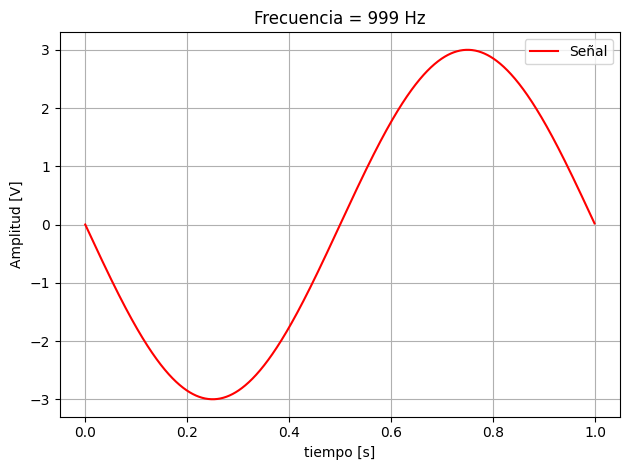

In [7]:
t_2, x_2 = funcion_sen(vmax, 0, 999, ph, nn, fs)
grafico(t_2, x_2, 'Frecuencia = 999 Hz', 'tiempo [s]', 'Amplitud [V]')

Para esta señal:

$$
ff = 999 \, \text{Hz}, \quad f_s = 1000 \, \text{Hz}
$$

No se cumple el Teorema de Nyquist, por lo que aparece el fenómeno de **aliasing**: cuando la frecuencia de la señal es muy cercana a la frecuencia de muestreo, la onda muestreada no representa la frecuencia real, sino una frecuencia “aparente” más baja, que surge del plegado de las componentes alrededor de la frecuencia de muestreo. 

$$
f_\text{alias} = |ff - k f_s| \tag{3}
$$
donde $k$ es un entero tal que $f_\text{alias} \leq f_s/2$.  

Como la señal tiene una frecuencia mayor que la mitad de la frecuencia de muestreo (límite de Nyquist), los puntos de muestreo no alcanzan a describirla correctamente. Esta situación se conoce como *undersampling* o submuestreo, donde las réplicas del espectro de la señal se superponen y no existe filtro pasa-bajos que permita reconstruir la señal apropiadamente, dando lugar a distorsiones. La frecuencias superiores a la frecuencia de Nyquist ($\frac{f_s}{2}$) se "doblan" hacia atrás y aparecen dentro del rango permitido $[\frac{-f_s}{2}, \frac{f_s}{2}]$.


Así, en este caso,  
$$
f_\text{alias} = |999 - 1* 1000| = 1 \, \text{Hz} 
$$

Como la frecuencia de la señal es superior a la frecuencia de Nyquist, la onda se pliega y se refleja, apareciendo dentro de la banda como una señal de `1 Hz`. Asimismo, la parte de la onda que se pliega hacia atrás invierte el sentido de avance de la fase, por lo que la onda reconstruida aparece en contrafase. Los puntos de la señal están apenas por debajo de la frecuencia de muestreo, es así que el gráfico muestra un **seno de 1 Hz en contrafase**, en lugar de 999 Hz.  

Algo similar sucede con las frecuencias de `ff = 1001 Hz` y `ff = 2001 Hz`:

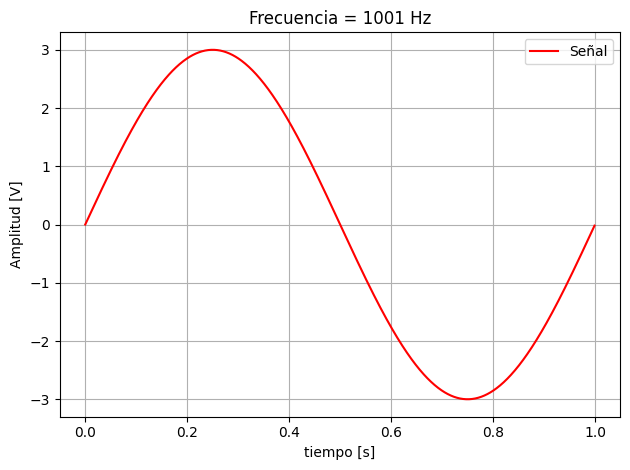

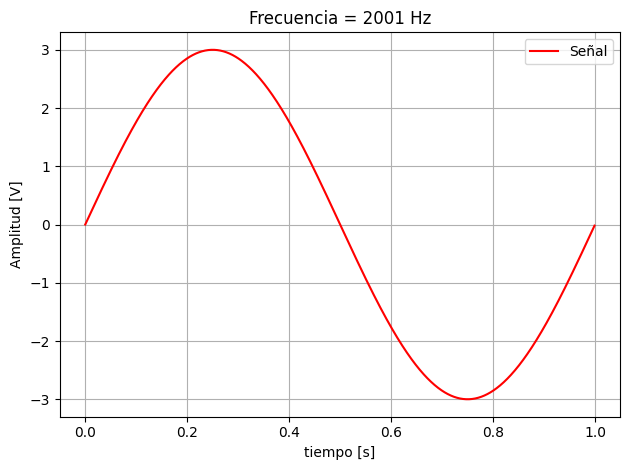

In [8]:
t_3, x_3 = funcion_sen(vmax, 0, 1001, ph, nn, fs)
grafico(t_3, x_3, 'Frecuencia = 1001 Hz', 'tiempo [s]', 'Amplitud [V]')

t_4, x_4 = funcion_sen(vmax, 0, 2001, ph, nn, fs)
grafico(t_4, x_4, 'Frecuencia = 2001 Hz', 'tiempo [s]', 'Amplitud [V]')

En ambos casos nos encontramos con *undersampling*, dando lugar a aliasing. 

En el caso de `ff = 1001 Hz`:  
$$
f_\text{alias} = |ff - k f_s| = |1001 - 1* 1000| = 1 \, \text{Hz}
$$

Se reconstruye un **seno de 1 Hz**, pero no invertido ya que su frecuencia está un poco por encima de la frecuencia de muestreo. 

En el caso de `ff = 2001 Hz`:
$$
f_\text{alias} = |ff - k f_s| = |2001 - 2* 1000| = 1 \, \text{Hz}
$$

La situación se repite, la frecuencia real se pliega y también se observa un **seno de 1 Hz** aunque sin invertir, por lo que en ambas señales hay pérdida de información. 

---
Finalmente, se generó una señal triangular con `signal.sawtooth` que produce una onda diente de sierra. Con `ancho` se ajustó la forma, tomando como valor `ancho = 0.5` para crear una onda simétrica, de igual pendiente de crecimiento que de decrecimiento.

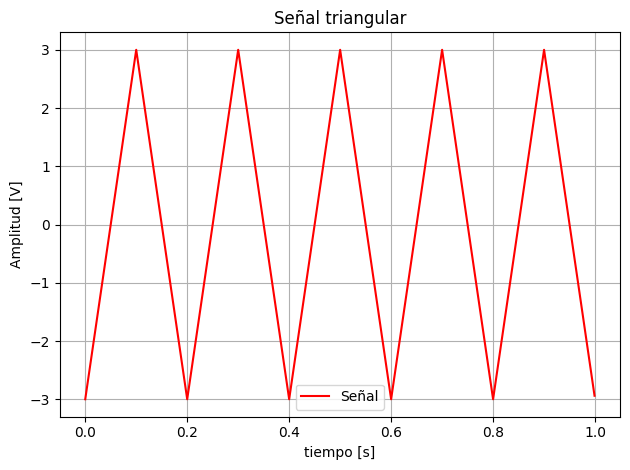

In [9]:
def funcion_triangular(vmax=1, dc=0, ff=1, ancho=0.5, nn=1000, fs=1000):
    t_muestra = 1/fs  # Obtengo tiempo al que se toma cada muestra  [s]
    
    tt = np.arange(nn) [:, np.newaxis] *t_muestra #(Nx1)
    xx = vmax*signal.sawtooth(2*np.pi*ff*tt, ancho) + dc    # signal.sawtooth es señal diente de sierra, ajusto ancho
    
    return tt, xx

t_5, x_5 = funcion_triangular(vmax, 0, 5, 0.5, nn, fs)
grafico(t_5, x_5, 'Señal triangular','tiempo [s]', 'Amplitud [V]')

Tomando como valor medio $dc = 0 \, \text{V}$, la onda crece desde $vmax = -3 \, \text{V}$ hasta $vmax = 3 \, \text{V}$ para, luego, decrecer nuevamente, repitiendo el mismo ciclo en el mismo tiempo. 

## Conclusión
En este trabajo se implementaron y analizaron distintas señales periódicas en un entorno digital, prestando especial atención al proceso de muestreo y a sus limitaciones.  

Se generaron señales sinusoidales, analizando como distintos valores de amplitud, frecuencia de la onda, fase y valor medio modifican la forma de la onda.  

Se comprobó experimentalmente la validez del teorema de Nyquist-Shannon, observando que cuando la frecuencia de la señal es mucho menor que la mitad de la frecuencia de muestreo, la representación digital conserva fielmente la forma original. Sin embargo, al aumentar la frecuencia hasta valores cercanos a la frecuencia de muestreo, comienzan a aparecer efectos de aliasing por *undersampling* o *critical sampling*, en los cuales la señal digitalizada adopta una forma distinta a la real, tal como se evidenció en los casos de `500 Hz`, `999 Hz`, `1001 Hz` y `2001 Hz`.

Finalmente, al incorporar señales de distinta forma, como la triangular, se reafirmó la importancia de un muestreo adecuado para preservar la información contenida en las señales analógicas.  

En conjunto, la práctica permitió comprender de manera integral tanto la teoría del muestreo como su impacto en la representación digital de señales.

## Reflexión personal
Al terminar este trabajo, me doy cuenta de que no se trató solo de programar funciones y graficar señales, sino de entender realmente cómo funciona el proceso de muestreo. Al principio parecía simple: generar una sinusoidal o una triangular y ver su forma. Pero a medida que fui aumentando las frecuencias y acercándome al límite de Nyquist-Shannon, aparecieron efectos que no son “errores” del código, sino fenómenos reales de la teoría de señales.  

Fui capaz de comprender la tarea, no obstante, requiero de un tiempo para comprender cómo varía la representación de la onda al acercar la frecuencia de la misma a la frecuencia de muestreo, sobre todo cuando la señal se ve invertida o desfasada, aunque en realidad no se trate de un desfasaje físico, sino de un efecto del muestreo.  

Este trabajo, además, me ayudó a comprender mejor el uso de Jupyter Notebooks, al tener que crear uno nuevo desde cero y organizar la información de forma que se comprenda el proceso que realicé y que me sea útil a la hora de, luego, estudiar y repasar.  

Para los comandos de formato estilo Markdown y LaTex utilicé las fuentes proporcionadas por la cátedra en el documento *notebook0*. Con el objetivo de profundizar en los contenidos teóricos recurrí a la bibliografía recomendada (*Thomas Holton - Digital Signal Processing*) y utilicé ChatGPT para convertir los vectores `tt` y `xx` a tamaño Nx1 y para reforzar conceptos del Teorema de Nyquist-Shannon. 